<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Diamond Prices Prediction Project</h2>
</div>

### Data Set Information:

**A dataset containing the prices and other features of almost 54,000 diamonds.**

### Features description

**Number of Attributes: 10 (9 predictive features, 1 target)**

Feature Information: A data frame with 53,940 rows and 10 variables:

price: price in US dollars (\$326--\$18,823) **(target)**

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # To ignore avoid warnings that may be promptedmond_data.

In [2]:
mond_data = pd.read_csv('diamonds.csv')

In [3]:
mond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
mond_data.shape

(53940, 10)

In [5]:
mond_data.duplicated().sum()

146

In [6]:
mond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
mond_data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [8]:
mond_data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
mond_data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
mond_data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Text(0.5, 1.0, 'DISTRIBUTION FOR CONTINUOUS FEATURES')

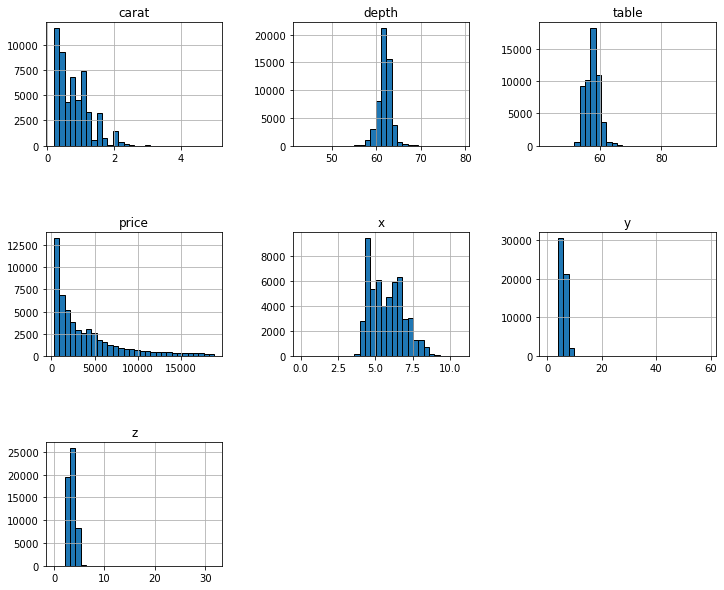

In [11]:
#Check the distribution of the columns 
mond_data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.title('DISTRIBUTION FOR CONTINUOUS FEATURES')

In [12]:
mond_data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Text(0.5, 1.0, 'percentage distribution of cut')

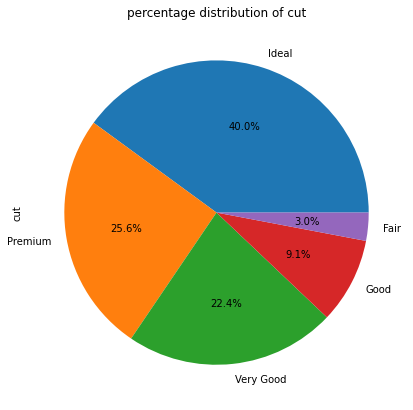

In [13]:

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
mond_data['cut'].value_counts().plot.pie(autopct='%1.1f%%')


plt.title('percentage distribution of cut')

**This datasets reveals the quality of the cut as follows:**

40% is Ideal

26% is Premium

22% is Very good

9% is Good and ;

3% to be fair


Text(0.5, 1.0, 'Percentage Distribution of Clarity')

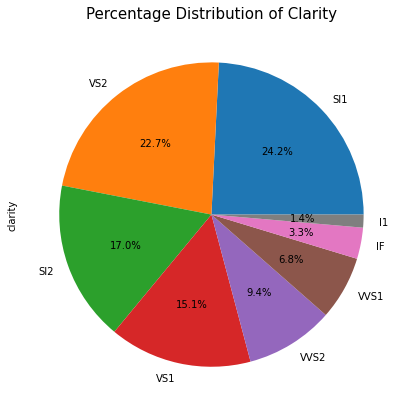

In [14]:

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
mond_data['clarity'].value_counts().plot.pie(autopct='%1.1f%%')


plt.title('Percentage Distribution of Clarity', size =15)

3% is the best best IF while 1.4% isthe worst I1

Text(0.5, 1.0, 'Percentage Distribution of Color')

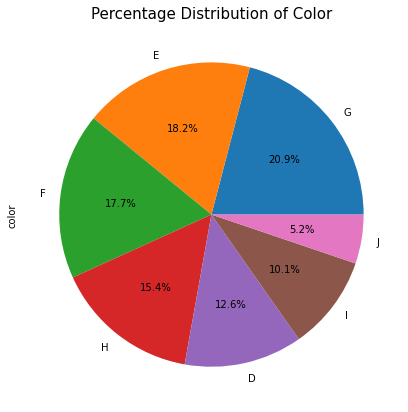

In [15]:

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
mond_data['color'].value_counts().plot.pie(autopct='%1.1f%%')


plt.title('Percentage Distribution of Color', size =15)

diamond colour, from J (worst)-5% to D (best)-13%

Text(0.5, 1.0, 'Carat Vs Quality of Cut  ')

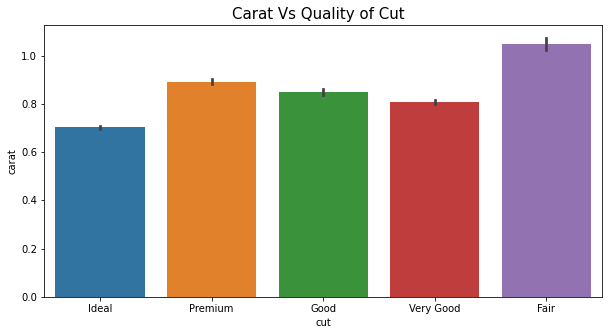

In [16]:
plt.figure(figsize= (10,5))
sns.barplot(x='cut', y='carat', data= mond_data)
plt.title('Carat Vs Quality of Cut  ', size= 15)
#plt.xticks(rotation=45)

Text(0.5, 1.0, "Carat Vs Measurement of Diamond's Clarity")

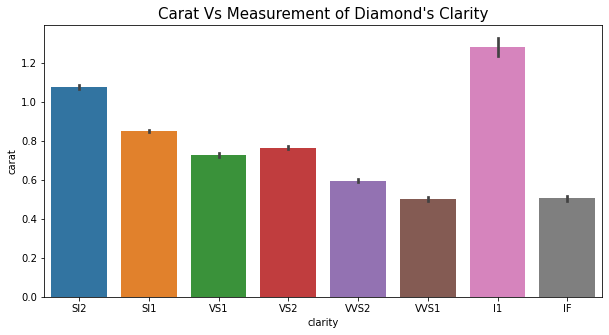

In [17]:
#Measurement of how clear the diamond 

plt.figure(figsize= (10,5))
sns.barplot(x= 'clarity', y='carat', data=mond_data)
plt.title("Carat Vs Measurement of Diamond's Clarity", size=15)

Text(0.5, 1.0, 'Clarity Vs Price')

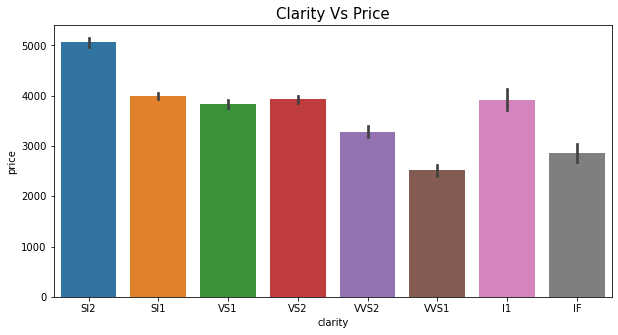

In [18]:
#Measurement of how clear the diamond 

plt.figure(figsize= (10,5))
sns.barplot(x= 'clarity', y='price', data=mond_data)
plt.title("Clarity Vs Price", size=15)

<AxesSubplot:>

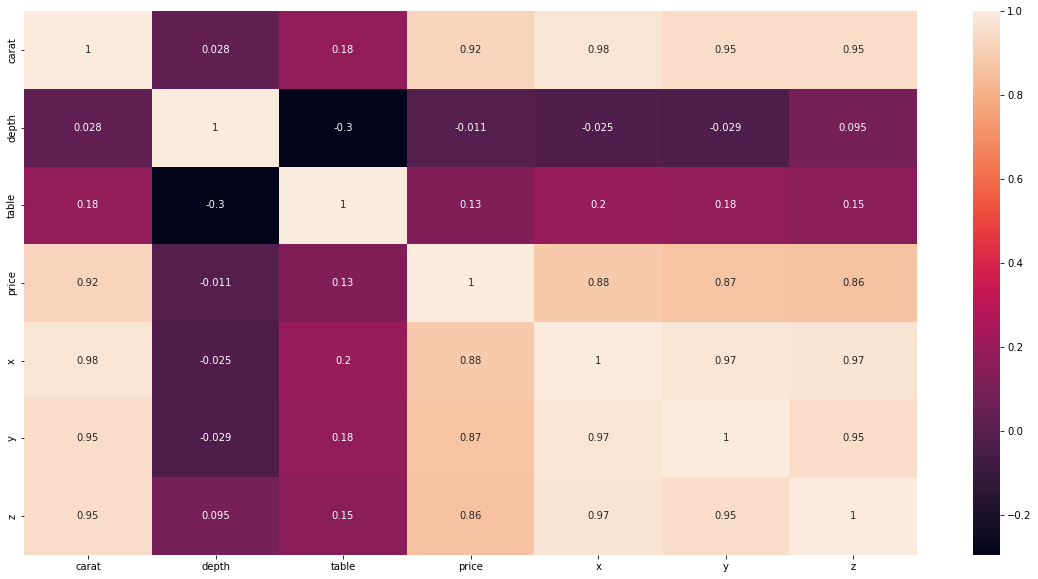

In [19]:
#finding correlation between target variable(price) and other features
plt.figure(figsize=(20,10))
sns.heatmap(mond_data.corr(),annot=True)

In [20]:
mond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>SPLITTING OF DATASET INTO TRAINING & TESTING</h2>
</div>

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import classification_report
from collections import OrderedDict

In [22]:
#splitting of the dataset into X_train and X_test

X_train, X_test =\
train_test_split(mond_data, test_size=0.3, random_state=0)

In [23]:
#Checking the size of the X_train
X_train.shape

(37758, 10)

In [24]:
#Checking the size of the X_test
X_test.shape

(16182, 10)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>DETECTING OUTLIERS</h2>
</div>

Text(0.5, 1.0, 'Boxplot')

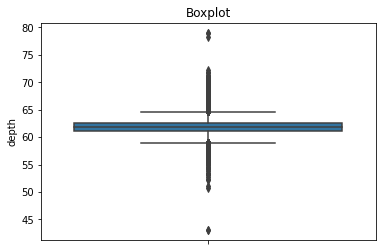

In [25]:
#Boxplot to examine outlier for column table
sns.boxplot(y=X_train['depth'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

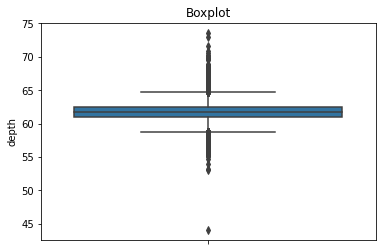

In [26]:
#Boxplot to examine outlier for column table
sns.boxplot(y=X_test['depth'])
plt.title('Boxplot')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>ENCODING FEATURES</h2>
</div>

In [27]:
#Using Label encoder to encode all categorical feature

encoder = LabelEncoder()

In [28]:
X_train['clarity'].unique()

array(['VS1', 'VVS2', 'SI2', 'SI1', 'VS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [29]:
X_train['color'].unique()

array(['G', 'H', 'E', 'F', 'I', 'D', 'J'], dtype=object)

In [30]:
#encoder to transform categorical values into corresponsding labels
"""taking all values with categorical values and one label to each of the unique values"""

mond_categ = ['clarity','color']

X_train[mond_categ] = X_train[mond_categ].apply(encoder.fit_transform)
X_test[mond_categ] = X_test[mond_categ].apply(encoder.fit_transform)

In [31]:
#Count the number of observations per category of cut, sort them in decreasing order, and index the categories

mond_cut_train_categ = [cat for cat in X_train['cut'].value_counts().sort_values(ascending=False).index]


mond_cut_test_categ = [cat for cat in X_test['cut'].value_counts().sort_values(ascending=False).index]

In [32]:
#Using One-Hot Encoding on the cut categorical feature

In [33]:
import numpy as np
#Now, let's add a binary variable per top category in the train and test sets:
for category in mond_cut_train_categ:
    X_train['cut' + '_' + category] = np.where(X_train['cut'] == category, 1, 0)
    
for category in mond_cut_test_categ:
    X_test['cut' + '_' + category] = np.where(X_test['cut'] == category, 1, 0)

In [34]:
X_train.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
45891,0.52,Premium,2,5,60.7,59.0,1720,5.18,5.14,3.13,0,1,0,0,0
52416,0.70,Good,0,2,63.6,60.0,2512,5.59,5.51,3.51,0,0,0,1,0
42613,0.32,Premium,5,4,61.3,58.0,505,4.35,4.39,2.68,0,1,0,0,0
43567,0.41,Ideal,3,1,61.0,57.0,1431,4.81,4.79,2.93,1,0,0,0,0
2732,0.91,Ideal,2,3,61.1,55.0,3246,6.24,6.19,3.80,1,0,0,0,0


In [35]:
X_train = X_train.drop(['cut'], axis=1)

In [36]:
X_test= X_test.drop(['cut'], axis=1)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>DROP TARGET VARIABLE FEATURE TO X_Y_TRAIN_TEST</h2>
</div>

In [37]:
#drop target variable into y_train and y_test

y_train = X_train['price']
X_train = X_train.drop(['price'], axis=1)

In [38]:
#drop target variable into y_train and y_test

y_test = X_test['price']
X_test = X_test.drop(['price'], axis=1)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>DATA SCALING</h2>
</div>

Why Scaling? 

RobustScaler is used to scale our dataset because it is robust to outliers, as it may not always be a good practice to remove outliers. In such cases, we use RobustScaler of scikit-learn. It removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).

In [39]:
"""set up the StandardScaler() from scikit-learn so that it learns and subtracts the mean but does not divide the result
by the standard deviation:"""

scaler_mean = StandardScaler(with_mean=True, with_std=False)

In [40]:
"""Next, set up the RobustScaler() from scikit-learn so that it does not remove the median from the values but divides them by the value range, that is, the difference between the maximum and minimum values:
Specify (0, 100) in the quantile_range argument of RobustScaler() to divide by the difference between the minimum and maximum values,"""

scaler_minmax = RobustScaler(with_centering=False, with_scaling=True, quantile_range=(0, 100))

In [41]:
#fit the scalers to the train set so that they learn and store the mean, maximum, and minimum values:
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

RobustScaler(quantile_range=(0, 100), with_centering=False)

In [42]:
#fit the scalers to the train set so that they learn and store the mean, maximum, and minimum values:

scaler_mean.transform(X_train)
scaler_minmax.transform(X_train) 

array([[0.20997921, 0.5       , 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       [0.32016632, 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23908524, 0.16666667, 0.42857143, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.06652807, 0.83333333, 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       [0.08523909, 0.5       , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.18918919, 0.33333333, 0.42857143, ..., 0.        , 0.        ,
        0.        ]])

In [43]:
#In other to avoid data leakage, the X_test is not fitted but only transform

In [44]:
scaler_mean.transform(X_test)
scaler_minmax.transform(X_test)

array([[0.22869023, 0.66666667, 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [0.26819127, 0.66666667, 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.24948025, 0.83333333, 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31392931, 0.66666667, 0.42857143, ..., 1.        , 0.        ,
        0.        ],
       [0.45322245, 0.33333333, 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [0.42619543, 0.5       , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [45]:
"""once  X_train and X_test has been transformed, the dataset are converted to a numpy array,
thus need to convert it back into pandas DataFrame"""

'once  X_train and X_test has been transformed, the dataset are converted to a numpy array,\nthus need to convert it back into pandas DataFrame'

In [46]:
X_train = pd.DataFrame(scaler_minmax.transform(X_train), columns= ['carat','color','clarity','depth','table','x','y','z', 'cut_Ideal','cut_Premium','cut_Very Good','cut_Good','cut_Fair'])
X_test = pd.DataFrame(scaler_minmax.transform(X_test), columns= ['carat','color','clarity','depth','table','x','y','z', 'cut_Ideal','cut_Premium','cut_Very Good','cut_Good','cut_Fair'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;">
<h2 style='margin:10px 5px'>FEATURES SELECTION</h2>
</div>

To carry out feature selection, the train_test_split needs to be joined together as a single dataset

In [47]:
#Concatenating the data in df variable

diamond_data =pd.concat([X_train, X_test],sort=False,ignore_index=True)
diamond_data.head()

,carat,color,clarity,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.209979,0.500000,0.571429,1.722222,1.583333,0.599628,0.107980,0.124843,1.0,0.0,0.0,0.0,0.0
1,0.320166,0.666667,1.000000,1.738889,1.555556,0.690875,0.124788,0.145283,1.0,0.0,0.0,0.0,0.0
2,0.239085,0.166667,0.428571,1.752778,1.750000,0.617318,0.110866,0.130503,0.0,0.0,1.0,0.0,0.0
3,0.085239,0.333333,0.571429,1.683333,1.583333,0.445996,0.082173,0.091824,1.0,0.0,0.0,0.0,0.0
4,0.112266,0.166667,1.000000,1.708333,1.583333,0.487896,0.089304,0.101572,1.0,0.0,0.0,0.0,0.0


In [48]:
diamond_data.shape

(53940, 13)

In [49]:
diamond_data_y =pd.concat([y_train, y_test],sort=False,ignore_index=True)
diamond_data_y.head()

0     6504
1    12171
2     5193
3     1007
4     2776
Name: price, dtype: int64

In [50]:
diamond_data_y.shape

(53940,)

In [51]:
diamond_data_y.value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
9867       1
17416      1
15370      1
12512      1
17898      1
Name: price, Length: 11602, dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;">
<h2 style='margin:10px 5px'>MACHINE LEARNING MODEL</h2>
</div>

**Linear regression model, Random Forest and XGBoost machine learning model are deployed.

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# LINEAR REGRESSION

In [56]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use the trainning data to train the estimator
linear_regression.fit(X_train, y_train)

LinearRegression()

In [57]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE)
y_train_pred = linear_regression.predict(X_train) #Train (Already seen this)
y_pred = linear_regression.predict(X_test) # Test(New)

#Coefficient of determination (r2)
print('Train r2 score: ', r2_score(y_train_pred, y_train)) 
print('Test r2 score: ', r2_score(y_test, y_pred))

#Mean squared Error
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)

#Root Mean Squared Error
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print('Train RMSE: %.2f' % train_rmse)
print('Test RMSE: %.2f' % test_rmse)

Train r2 score:  0.8715836577228376
Test r2 score:  0.8891964375655027
Train RMSE: 1345.67
Test RMSE: 1328.28


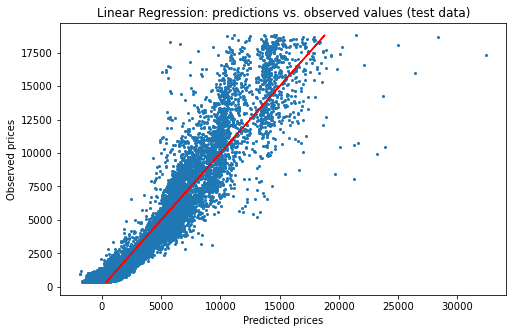

In [58]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Linear Regression: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted prices')
ax.set_ylabel('Observed prices');

# RANDOM FOREST REGRESSION

In [59]:
from sklearn.ensemble import RandomForestRegressor
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
rf = RandomForestRegressor(max_depth=3) #Notice here also we are using here "random forest regressor" not "random forest classifier"
# 3. Use the trainning data to train the estimator
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [62]:
y_train_pred_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred_rf, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred_rf))

train_mse_rf = mean_squared_error(y_train_pred_rf, y_train)
test_mse_rf = mean_squared_error(y_pred_rf, y_test)

train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

print("------------------------------------")
print('Train RMSE: %.2f' % train_rmse_rf)
print('Test RMSE: %.2f' % test_rmse_rf)

Train r2 score:  0.8700675588106692
Test r2 score:  0.8859157657341683
------------------------------------
Train RMSE: 1346.81
Test RMSE: 1347.80


# XGBOOST REGRESSION MODEL

In [63]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
y_train_pred_xgb = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred_xgb, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred_xgb))

train_mse_xgb = mean_squared_error(y_train_pred_xgb, y_train)
test_mse_xgb = mean_squared_error(y_pred_xgb, y_test)

train_rmse_xgb = np.sqrt(train_mse_xgb)
test_rmse_xgb= np.sqrt(test_mse_xgb)

print("------------------------------------")
print('Train RMSE: %.2f' % train_rmse_xgb)
print('Test RMSE: %.2f' % test_rmse_xgb)

Train r2 score:  0.9914162227526694
Test r2 score:  0.9807582998755142
------------------------------------
Train RMSE: 367.26
Test RMSE: 553.52


# XGBOOST HYPERPARAMETER TUNNING

In [67]:
xgb_model_xgb2 = XGBRegressor(n_estimators=1000)
xgb_model_xgb2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=True)

y_train_pred_xgb2 = xgb_model_xgb2.predict(X_train)
y_pred_xgb2 = xgb_model_xgb2.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred_xgb2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred_xgb2))

train_mse_xgb2 = mean_squared_error(y_train_pred_xgb2, y_train)
test_mse_xgb2 = mean_squared_error(y_pred_xgb2, y_test)

train_rmse_xgb2 = np.sqrt(train_mse_xgb2)
test_rmse_xgb2= np.sqrt(test_mse_xgb2)

print("------------------------------------")
print('Train RMSE: %.2f' % train_rmse_xgb2)
print('Test RMSE: %.2f' % test_rmse_xgb2)

[0]	validation_0-rmse:3987.10352
[1]	validation_0-rmse:2857.62085
[2]	validation_0-rmse:2085.31909
[3]	validation_0-rmse:1559.45483
[4]	validation_0-rmse:1215.19312
[5]	validation_0-rmse:986.06677
[6]	validation_0-rmse:839.86346
[7]	validation_0-rmse:748.38049
[8]	validation_0-rmse:692.43945
[9]	validation_0-rmse:660.30780
[10]	validation_0-rmse:627.25598
[11]	validation_0-rmse:614.72113
[12]	validation_0-rmse:601.29523
[13]	validation_0-rmse:592.68768
[14]	validation_0-rmse:587.70306
[15]	validation_0-rmse:584.09827
[16]	validation_0-rmse:579.80786
[17]	validation_0-rmse:575.75073
[18]	validation_0-rmse:574.26776
[19]	validation_0-rmse:571.19293
[20]	validation_0-rmse:566.88934
[21]	validation_0-rmse:564.60730
[22]	validation_0-rmse:563.90704
[23]	validation_0-rmse:562.18652
[24]	validation_0-rmse:561.37293
[25]	validation_0-rmse:560.51508
[26]	validation_0-rmse:559.96576
[27]	validation_0-rmse:559.94928
[28]	validation_0-rmse:559.79248
[29]	validation_0-rmse:559.79553
[30]	validation

# XGBOOST PREDICTION

In [71]:
# Making predictions
diamond_price_prediction = OrderedDict([('carat',0.45), ('color', 1.0), ('clarity', 0.0), ('depth',62.3), 
                           ('table',59.0), ('x',3.95), ('y',3.92), ('z',2.45), ('cut_Ideal',0.0),
                           ('cut_Premium',1.0), ('cut_Very Good',0.0), ('cut_Good',0.0),('cut_Fair', 1.0)])

diamond_price_prediction = pd.Series(diamond_price_prediction).values.reshape(1,-1)

In [72]:
diamond_price_prediction

array([[ 0.45,  1.  ,  0.  , 62.3 , 59.  ,  3.95,  3.92,  2.45,  0.  ,
         1.  ,  0.  ,  0.  ,  1.  ]])

In [73]:
xgb_model.predict(diamond_price_prediction) 
#Use our best model to predict the price of a new daimond 
#coming in just now.

array([11478.683], dtype=float32)

In [ ]:
** XGBoost model prediction shows that the carat, width and depth has contributed to the high price of the daiamond predicted
Meaning, the higher the features listed the higher the price.**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;">
<h2 style='margin:10px 5px'>SHAPELY- MACHINE LEARNING MODEL</h2>
</div>

In [74]:
import shap

In [75]:
explainer =shap.Explainer(xgb_model)
shap_values = explainer(X_test)

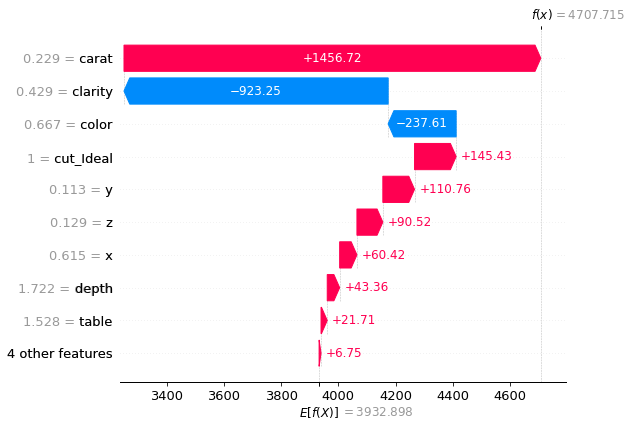

In [76]:
shap.plots.waterfall(shap_values[0])

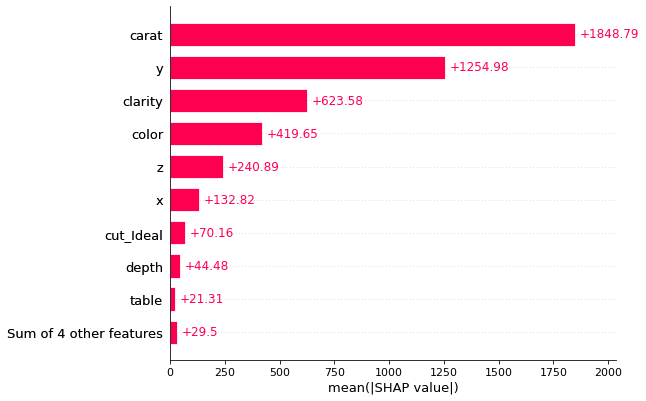

In [77]:
shap.plots.bar(shap_values)

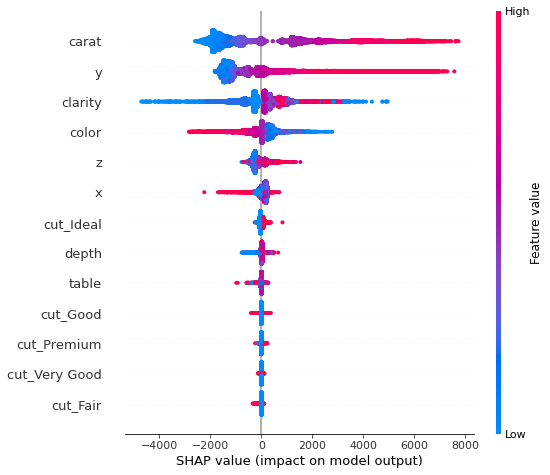

In [78]:
shap.summary_plot(shap_values, X_test)

In [79]:
shap.initjs()
shap.force_plot(shap_values[0])

**We import Diamond Price Dataset containing the prices and other features of almost 54,000 diamonds, with Number of Attributes: 10 (9 predictive features, 1 target)

**We split the dataset into training and test sets and train an XGBoost regressor on the training data.**

**We initialize a SHAP TreeExplainer with the trained XGBoost model. This explainer is specifically designed for tree-based models like XGBoost.**

**We calculate SHAP values for the test set using the shap_values method of the explainer. These values represent the feature importances for each instance in the test set.**

**We visualize the global feature importances using SHAP’s summary_plot function with plot_type="bar". This plot shows the mean absolute SHAP values for each feature, providing an overview of the most influential features in the model.**

**To interpret an individual prediction, we select a random instance from the test set and use SHAP’s force_plot function. This plot shows how each feature contributes to the model’s prediction for this specific instance, with positive values pushing the prediction towards the positive class and negative values pushing it towards the negative class.**

**SHAP provides a powerful way to interpret XGBoost models by quantifying the impact of each feature on the model’s predictions.** 

**The summary_plot gives a global view of feature importances, while the force_plot provides understanding of the factors driving a specific prediction.** 